


<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Applied AI Assignments/Module 6/Personalized Cancer Diagnosis/training_variants.zip')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()
data.shape[1]

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


4

<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [5]:
# note the seprator in this file
import pandas as pd
data_text =pd.read_csv("/content/drive/MyDrive/Applied AI Assignments/Module 6/Personalized Cancer Diagnosis/training_text.zip",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


<h3>3.1.3. Preprocessing of text</h3>

In [6]:
# loading stop words from nltk library
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string # storing the all split words from Text column as each multiple strings and (index) row wise.
               

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:

#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")
print(data_text.head())

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 22.869685000000004 seconds
   ID                                               TEXT
0   0  cyclin dependent kinases cdks regulate variety...
1   1  abstract background non small cell lung cancer...
2   2  abstract background non small cell lung cancer...
3   3  recent evidence demonstrated acquired uniparen...
4   4  oncogenic mutations monomeric casitas b lineag...


In [12]:


#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [14]:
#df.any returns if any element is NaN in any of the value in the dataframe
# df.isnull() checks for NaN values and returns True if found to df.any() function and this 
# result.isnull().any(axis=1) - checks whether NaN value exists in every row and returns True/False 
# and using this True or False we can print the NaN values wherever available
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [15]:


result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+ result['Variation']

In [16]:

result[result['ID']==1109]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F


<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [17]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_') # replace strings with multiple spaces with a single space underscore symbol
result.Variation = result.Variation.str.replace('\s+', '_') # replace strings with multiple spaces with a single space underscore symbol

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [18]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

8     12
9     24
3     57
5    155
6    176
2    289
1    363
4    439
7    609
Name: Class, dtype: int64


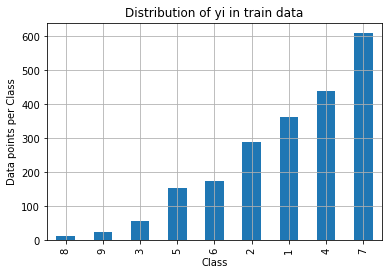

[8 7 6 5 4 3 2 1 0]
Number of data points in class 7 : 609 ( 28.672 %)
Number of data points in class 4 : 439 ( 20.669 %)
Number of data points in class 1 : 363 ( 17.09 %)
Number of data points in class 2 : 289 ( 13.606 %)
Number of data points in class 6 : 176 ( 8.286 %)
Number of data points in class 5 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 9 : 24 ( 1.13 %)
Number of data points in class 8 : 12 ( 0.565 %)
--------------------------------------------------------------------------------


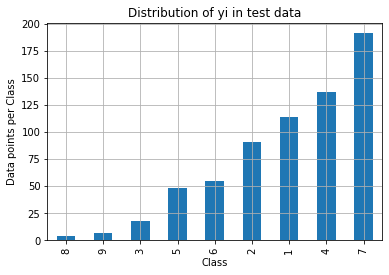

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)
--------------------------------------------------------------------------------


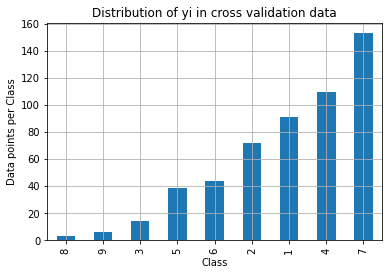

Number of data points in class 7 : 153 ( 28.759 %)
Number of data points in class 4 : 110 ( 20.677 %)
Number of data points in class 1 : 91 ( 17.105 %)
Number of data points in class 2 : 72 ( 13.534 %)
Number of data points in class 6 : 44 ( 8.271 %)
Number of data points in class 5 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 9 : 6 ( 1.128 %)
Number of data points in class 8 : 3 ( 0.564 %)


In [19]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sort_values() # value_counts counts the frequency of each class labels  
                                                                          # ie, (1,2,.9) and sorts the frequencies in descending order
test_class_distribution = test_df['Class'].value_counts().sort_values()
cv_class_distribution = cv_df['Class'].value_counts().sort_values()


print(train_class_distribution)


my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()



# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values) # this gives the index of -test_class_distribution' -> list [7,4,1,2,6,5,3,9,8]
                                                         # which returns indices as [8 7 6 5 4 3 2 1 0]

print(sorted_yi)
for i in sorted_yi:
    print('Number of data points in class', train_class_distribution.index[i], ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/sum(train_class_distribution.values)*100), 3), '%)')

 
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()



# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values) 

for i in sorted_yi:
    print('Number of data points in class', test_class_distribution.index[i], ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', cv_class_distribution.index[i], ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


In [20]:
train_class_distribution.values

array([ 12,  24,  57, 155, 176, 289, 363, 439, 609])

In [21]:

train_class_distribution.values[8]


609

<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [24]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y): # plot_confusion_matrix(y_true,y_pred)
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)   # Recall matrix (row sum=1)
    #divid each element of the confusion matrix with the sum of elements in that Row (axis=1)
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axis = 1).shape = (9,1) eg : dividing each element in 'C' with C.sum(axis=1) value ie, every element in C is divided 
    # by sum of the corrosponding row.

    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    # B.shape : (2,2)
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axis =0) = [[4, 6]]
    # C.sum(axis =0).shape : (2,1)
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing confustion matrix C in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing Precision matrix in heat map format using B
    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    
    # representing Recall matrix in heat map format using A
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [25]:
rand_1 = np.random.rand(1,5)
print(rand_1)
print(sum(rand_1))
print(sum(sum(rand_1)))
print(rand_1[0])

[[0.65842361 0.6806016  0.72110142 0.4481915  0.56079778]]
[0.65842361 0.6806016  0.72110142 0.4481915  0.56079778]
3.0691159087046267
[0.65842361 0.6806016  0.72110142 0.4481915  0.56079778]


(532,)
(532, 9)
(532, 9)
(532,)
Log loss on Cross Validation Data using Random Model 2.508677082169539
Log loss on Test Data using Random Model 2.5492272408075087
****************************************************************************************************
(665,)
-------------------- Confusion matrix --------------------


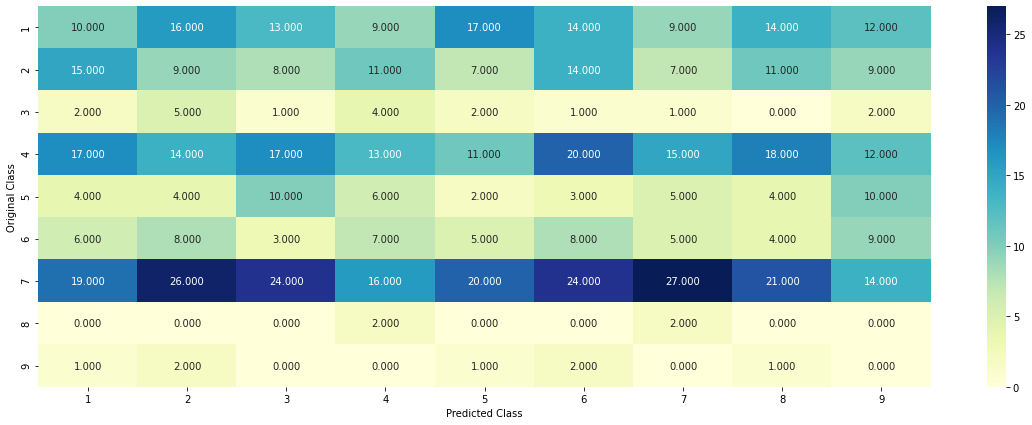

-------------------- Precision matrix (Columm Sum=1) --------------------


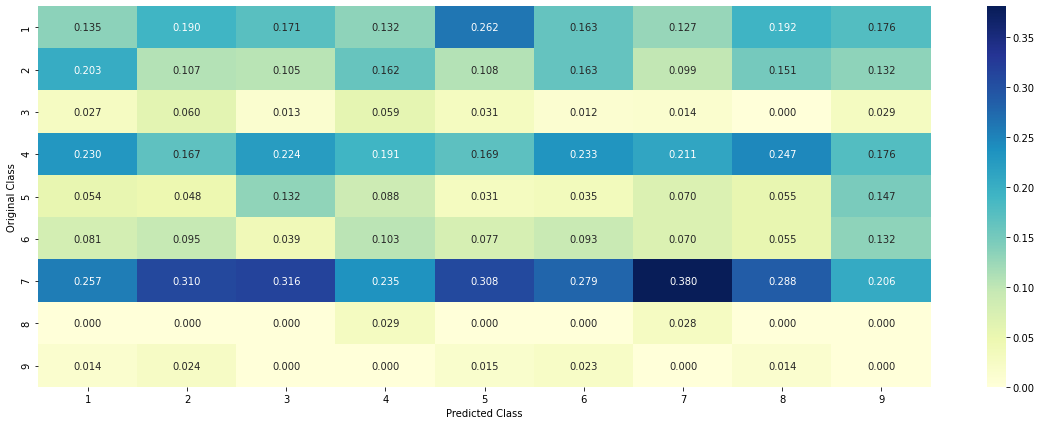

-------------------- Recall matrix (Row sum=1) --------------------


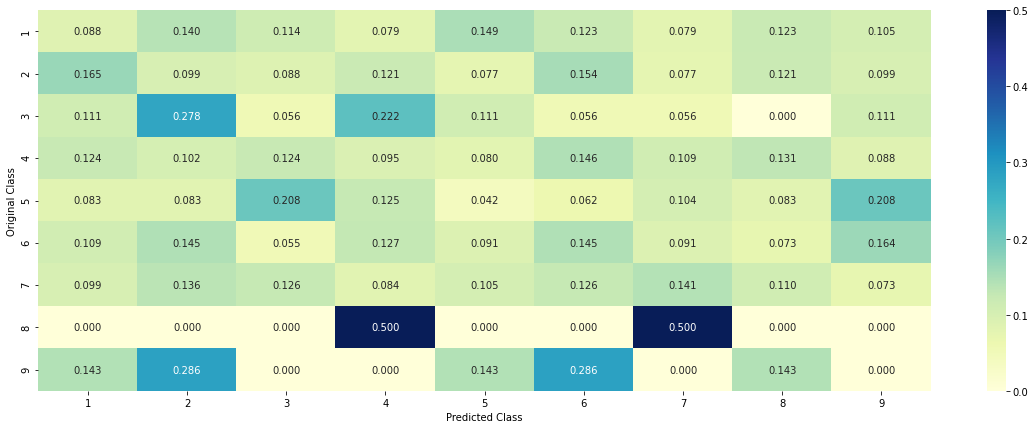

In [145]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]
print(y_cv.shape)

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))


print(cv_predicted_y.shape)
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9) # creates an array of prob values (between 0 to 1) and array is a single row of values.
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0]) # prints as a single row of an array (removes this :- [])

print(cv_predicted_y.shape)

print(y_cv.shape)
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))

for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])

print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))
# sklearn.metrics.log_loss(y_true, y_pred, *, eps=1e-15, normalize=True, sample_weight=None, labels=None)

predicted_y =np.argmax(test_predicted_y, axis=1) # for each row, max element is returned.
# The numpy.argmax() function returns indices of the max element of the array in a particular axis. 
print("*"*100)

print(predicted_y.shape)
plot_confusion_matrix(y_test, predicted_y+1)

<h2>3.3 Univariate Analysis</h2>

In [146]:
train_df['Gene'].duplicated()
train_df[train_df['Gene'].duplicated()]
print(train_df[train_df['Gene'].duplicated()])
number_of_duplicate_Genes = train_df.shape[0] - train_df[train_df['Gene'].duplicated()].shape[0]
print('number of duplicate genes = ' , number_of_duplicate_Genes)

        ID    Gene  ... Class                                               TEXT
418    418    TP53  ...     1  many p53 missense mutations possess dominant n...
53      53   PTPRT  ...     1  receptor protein tyrosine phosphatase ptprt pt...
2184  2184    PTEN  ...     1  pten phosphatase tensin homolog phosphatase un...
648    648  CDKN2A  ...     4  p16 gene located chromosome 9p21 region linked...
2231  2231    PTEN  ...     4  pten phosphatase tensin homolog phosphatase un...
...    ...     ...  ...   ...                                                ...
140    140    EGFR  ...     5  accurate determination perfluoroalkyl substanc...
2552  2552   BRCA1  ...     1  genetic screening breast ovarian cancer suscep...
1887  1887    MTOR  ...     2  mcf 7 breast cancer cell line exposed high con...
3078  3078  NOTCH1  ...     1  since notch phenotypes drosophila melanogaster...
2198  2198    PTEN  ...     4  tumour suppressor gene pten maps 10q23 3 encod...

[1892 rows x 5 columns]
num

In [158]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [159]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))


Number of Unique Genes : 232
BRCA1     169
TP53      104
EGFR       89
PTEN       85
BRCA2      83
KIT        68
BRAF       59
ERBB2      46
CDKN2A     38
PDGFRA     38
Name: Gene, dtype: int64


In [160]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 232 different categories of genes in the train data, and they are distibuted as follows


In [161]:
print(unique_genes.values)

[169 104  89  85  83  68  59  46  38  38  35  34  32  32  31  30  29  29
  28  27  23  22  20  20  19  18  18  18  18  17  16  16  16  16  15  15
  15  15  14  14  14  13  13  13  12  12  12  12  12  12  11  11  11  10
  10  10  10  10   9   9   9   9   9   8   8   8   7   7   7   7   7   6
   6   6   6   6   6   6   5   5   5   5   5   5   5   5   5   5   5   5
   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   3   3
   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3
   3   3   3   3   3   3   3   2   2   2   2   2   2   2   2   2   2   2
   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1]


2124


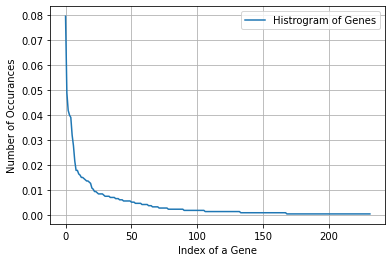

In [162]:
s = sum(unique_genes.values);
print(s)
h = unique_genes.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()


<class 'numpy.ndarray'>


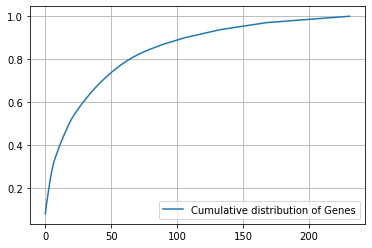

In [163]:
print(type(h))
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

#### Top 50 genes allmost contribute 70% of data and remaining genes contribute around 30% of data. 

####Lots of genes occur very few times and 

####very few genes occur a lot of times

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [164]:

#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [165]:

print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


In [166]:
# one-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene']) # apply fit function only on train dataset.
print(train_gene_feature_onehotCoding.shape)
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

(2124, 231)


In [167]:

train_df['Gene'].head()


396       TP53
57       PTPRT
712      ERBB2
660     CDKN2A
1977    CTNNB1
Name: Gene, dtype: object

In [169]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 231)


<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.2065111793029595
For values of alpha =  0.0001 The log loss is: 1.1740830864376361
For values of alpha =  0.001 The log loss is: 1.2063988450448655
For values of alpha =  0.01 The log loss is: 1.3203477637884393
For values of alpha =  0.1 The log loss is: 1.4186670759847146
For values of alpha =  1 The log loss is: 1.4650286468218945


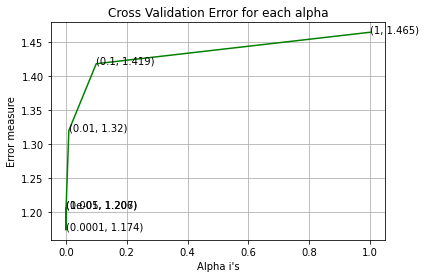

For values of best alpha =  0.0001 The train log loss is: 0.9804750715720683
For values of best alpha =  0.0001 The cross validation log loss is: 1.1740830864376361
For values of best alpha =  0.0001 The test log loss is: 1.2424622878812428


In [170]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# the above code can also be written as 
# alpha = []
# for x in range(-5,1):
  #  a = 10**x
  #  alpha.append(a)
#print(alpha)

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------
# one-hot encoding of Gene feature.
# gene_vectorizer = CountVectorizer()
# train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
# test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
# cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42) # model initialization for diff values of alpha.
    clf.fit(train_gene_feature_onehotCoding, y_train) # training the model by using "Gene" feature alone.
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid") # here clf is the base estimator which is Logistic regression with SGD Classifier
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    # sklearn.metrics.log_loss(y_true, y_pred, *, eps=1e-15, normalize=True, sample_weight=None, labels=None)
    # If not provided, labels will be inferred from y_true. 

    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
   


fig, ax = plt.subplots()  # creates the figure and subplots ie, divides the figure into no of rows and no of columns
ax.plot(alpha, cv_log_error_array,c='g') # creates a line plot of x-axis vs y-axis
for i, txt in enumerate(np.round(cv_log_error_array,3)): # iteration over list cv_log_error_array,start index=0 (by default)
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
    # (alpha[i],cv_log_error_array[i] ) is the xy position that is where to plot 
    # and (alpha[i],np.round(txt,3)) is the text i.e at above position what is text to be placed ie, (alpha[i],txt)
  
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array) # index of the minimum logloss from the cv_log_error_array is returned.
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42) # creating model with the best alpha value.
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


For values of alpha =  1e-05 The log loss is: 1.1920654126318906
For values of alpha =  0.0001 The log loss is: 1.1719090843992945
For values of alpha =  0.001 The log loss is: 1.1706079496523558
For values of alpha =  0.01 The log loss is: 1.2262777903942512
For values of alpha =  0.1 The log loss is: 1.257683071987082
For values of alpha =  1 The log loss is: 1.27970967749678


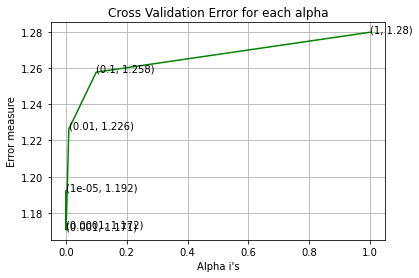

For values of best alpha =  0.001 The train log loss is: 0.9998172495391526
For values of best alpha =  0.001 The cross validation log loss is: 1.1706079496523558
For values of best alpha =  0.001 The test log loss is: 1.380411313266326


In [171]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# the above code can also be written as 
# alpha = []
# for x in range(-5,1):
  #  a = 10**x
  #  alpha.append(a)
#print(alpha)

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="isotonic") # here clf is the base estimator which is Log regression with SGD Classifier
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="isotonic")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [172]:

print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  232  genes in train dataset?
Ans
1. In test data 647 out of 665 : 97.29323308270676
2. In cross validation data 515 out of  532 : 96.80451127819549


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [173]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1928
Truncating_Mutations    62
Amplification           48
Deletion                42
Fusions                 25
Overexpression           5
G12V                     4
Q61R                     3
Q61L                     3
A146T                    2
M1R                      2
Name: Variation, dtype: int64


In [174]:

print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1928 different categories of variations in the train data, and they are distibuted as follows


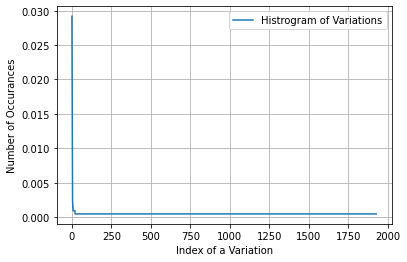

In [175]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.02919021 0.05178908 0.07156309 ... 0.99905838 0.99952919 1.        ]


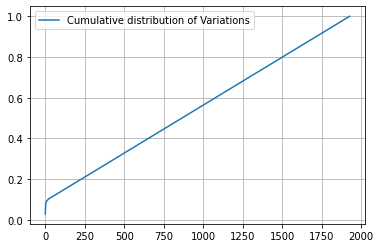

In [176]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [177]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [178]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


In [179]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [180]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1957)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Let's build a model just like the earlier!

For values of alpha =  1e-05 The log loss is: 1.7097467640795052
For values of alpha =  0.0001 The log loss is: 1.7043560119423258
For values of alpha =  0.001 The log loss is: 1.7060014920834
For values of alpha =  0.01 The log loss is: 1.7239224053804487
For values of alpha =  0.1 The log loss is: 1.7256899316149004
For values of alpha =  1 The log loss is: 1.7266281353249178


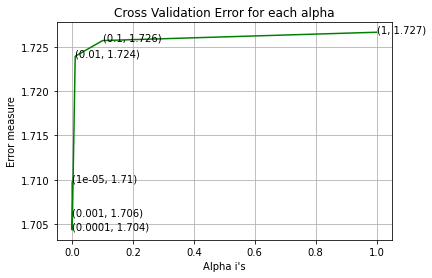

For values of best alpha =  0.0001 The train log loss is: 0.6507121779561523
For values of best alpha =  0.0001 The cross validation log loss is: 1.7043560119423258
For values of best alpha =  0.0001 The test log loss is: 1.7319445589512366


In [181]:

alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [182]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]

cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1928  genes in test and cross validation data sets?
Ans
1. In test data 67 out of 665 : 10.075187969924812
2. In cross validation data 57 out of  532 : 10.714285714285714


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [183]:
train_df.head(2)

,ID,Gene,Variation,Class,TEXT
396,396,TP53,R175H,4,tumor suppressor p53 dependent apoptosis thoug...
57,57,PTPRT,Y412F,1,receptor protein tyrosine phosphatase ptprt pt...


In [184]:
# cls_text is a data frame
# for every row in data frames consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word
#  extract_dictionary_paddle(train_df)
def extract_dictionary_paddle(cls_text): # this helps in computing P(Wi/y=1), P(Wi/y=2),....P(Wi/y=9) 
                                         # where matching class_label train_df is passed to cls_text parameter.
                                         # And also in computing total_dict where train_df is the dataframe passed to cls_text paramet
    dictionary = defaultdict(int)        # It provides a default value for the key that does not exists
    for index, row in cls_text.iterrows(): # here cls_text is DataFrame. And here index will start with zero
                                           # And 'row' will take the first Row of the DataFrame cls_text 
                                           # And here 'row' is also DataFrame with only one Row (all columns) each time.
        for word in row['TEXT'].split():   # row['TEXT] is simillar to df['COLUMN'] and here "TEXT" in this Row of Text is split into individual words
            dictionary[word] +=1           # returns the tuple of dictionary ie, [('w1',2),('w2',15).....
    return dictionary                      # refers to no of times the w1 occured, w2 occured and so on.
# 1. all the text matching the (class_text) class label =1 are split into words and stored in a List (row['TEXT'].split()).
# 2. And then the count of each word is calculated ie,eg: w1 occures 20 times, w2 occures 50 times etc.
# 3. row['TEXT'].split() is an object of type "list"                                           
# 4. here in the code 'row' refers to the DataFrame
# imp: here Row refers to the as usual Rows in the table or DataFrame.

# Tracing of total_dict calculation:
# 1. extract_dictionary_paddle(train_df) and takes the whole train_df Data.
# 2. row in cls_text.iterrows() : to iterate over the row in the train_df Data.
# 3. row['TEXT'].split() is like train_df['TEXT']: splits the whole train_df['TEXT'] into indidual words
# 4. And stores in the dictionary ie, "total_dict"

Defaultdict is a container like dictionaries present in the module collections. Defaultdict is a sub-class of the dict class that returns a dictionary-like object. The functionality of both dictionaries and defualtdict are almost same except for the fact that defualtdict never raises a KeyError. It provides a default value for the key that does not exists

In [187]:
train_df[train_df['Class']==6]

,ID,Gene,Variation,Class,TEXT
712,712,ERBB2,C630Y,6,purpose mutations associated resistance kinase...
2814,2814,BRCA2,K1434I,6,twenty percent individuals strong family perso...
2870,2870,BRCA2,V2969M,6,mutation screening breast ovarian cancer predi...
2445,2445,BRCA1,S1651P,6,mutations brca1 brca2 account majority heredit...
541,541,SMAD2,Y406H,6,ligand induced phosphorylation receptor regula...
...,...,...,...,...,...
1468,1468,FGFR2,G701S,6,introduction melanoma lethal skin cancers amer...
2794,2794,BRCA2,T582P,6,mutation screening breast ovarian cancer predi...
2883,2883,BRCA2,T2722R,6,mutation screening breast ovarian cancer predi...
383,383,TP53,H115N,6,sequence specific dna binding exonuclease acti...


In [188]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df): # df takes the parameter train_df/test_df/cv_df.
    text_feature_responseCoding = np.zeros((df.shape[0],9)) 
    # here df.shape[0] : No of Rows and here 9 refers to No of columns
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows(): # here df refers to "train_text_feature_responseCoding  = get_text_responsecoding(train_df)"
                                         # df refers to train_df,test_df and cv_df.
            sum_prob = 0
            for word in row['TEXT'].split(): # simillar df['column'] and splits the whole train_df['TEXT'] into individual words
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90))) # word is the key and count=value.
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            # row_index : represents the row and i represents the column
            # text_feture_responseCoding is a datafrme
            # first timetext_feture_responseCoding[0][0], text_feture_responseCoding[1][0] (for 2nd split word), text_feture_responseCoding[2][0]....
            # text_feture_responseCoding.shape : (no of rows,9) :-> no of columns = 9
            row_index += 1
    return text_feature_responseCoding
# row is a dataframe with single row columns from train_df/test_df/cv_df (here referred as df)
# dict_list =[] contains 9 dictoinaries each corresponds to a class
# And each dictionary contains the count of occurance of each word in train_df['TEXT'] with class label=1/2/....9.
# And each dictionary has words count with corrosponding class label.
# dict_list[i] is build on i'th  class text data (using the training data corrsosponding to class i)
# math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90))) :
#  here for word in row['TEXT'].split(): splits the whole train_df into indidual words.
#  1. here dict_list has 9 dictionaries and each dictionary has count of each word from 'train_df' and each dictionary with (in class label =1/2/....9) separately
#  2. dict_list[i].get(word,0): gives us the word value (count) in dict0/ dict1,....dict8
#  3. (dict_list[i].get(word,0) +10) : to avoid undefined (because log(0) is not defined).
#  4. suppose if a word is not present in the dict_list[i], then it is taken care by "laplace smoothing" as in above step.
#  5. (total_dict.get(word,0)+90) : returns the count of the word (ie, key) {from word in row['TEXT'].split()} in train_df (value)
#  6. log(P(y=1)/(w1,w2,....wk)) = summation(log[P(wi/y=1)])/(total_No_Of_Words_in_train_Df) : programmatically RHS is computed as below:
        # sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))

#  7. OR P(y=1)/(w1,w2,....wk) = exp(summation(log[P(wi/y=1)])) :Programmatically LHS is computed as below:
        # text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))

In [189]:

from sklearn.preprocessing import OneHotEncoder
onehotencoding = OneHotEncoder(handle_unknown='ignore')
onehotencoding.fit(corpus)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [190]:


# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT']) # here we are passing train_df['TEXT'] dataframe
# And we are transforming the object ie,'text_vectorizer' of class 'CountVectorizer'  in the above code.
# getting all the feature names (words) 
train_text_features= text_vectorizer.get_feature_names() # here we are calling object.method ie, text_vectorizer.get_feature_names()

#print(len(train_text_features)) # 53212
#print(train_text_feature_onehotCoding.shape)
#print(type(train_text_features)) # type list object
#print(type(text_vectorizer)) # objct of class CountVectorizer.
#print("*"*100)

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every column and returns (number of features * 1) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1 #will return sum of every feature (word) column wise ie, (52890,1) shaped vector
#print(train_text_feature_onehotCoding.shape) # (2124, 52890) (onehotencoded = no of rows in train_df, no of unique words whole in train_df)
# print(train_text_fea_counts.shape) # (52890,1) 
# train_text_feature_onehotCoding.sum(axis=0).A1 : will return sum of every feature (word) column wise ie, (52890,1) shaped vector

print(type(train_text_feature_onehotCoding)) # class 'scipy.spars.csr.csr_matrix'
# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
#text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))
print(len(text_fea_dict)) # 52890 words (as key) and their count as value.
print("Total number of unique words in train data :", len(train_text_features))

<class 'scipy.sparse.csr.csr_matrix'>
54106
Total number of unique words in train data : 54106


In [232]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]  # only matching class labels dataframe will be returned.
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text)) # this function returns the count of occurance of each word in text corpus.
    # append it to dict_list
print(type(cls_text))
# dict_list[i] is build on i'th  class text data (using the training data corrsosponding to class i)
# total_dict is buid on whole training text data and stores all the words count in the whole "train_df"
total_dict = extract_dictionary_paddle(train_df) # function call, which returns count of occurance of each word in train_df.

# for word in row['TEXT'].split():   
#   dictionary[word] +=1 
# total_dict = extract_dictionary_paddle(train_df) # function call, which returns count of occurance of each word in train_df.

print(len(dict_list))
#print(total_dict)
print(len(total_dict))
print(type(total_dict))
confuse_array = []
for i in train_text_features: # train_text_features= text_vectorizer.get_feature_names() : gets the all words in train_df['TEXT']
    ratios = []
    max_val = -1
    for j in range(0,9): 
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90)) # here 
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)
print(confuse_array.shape) # (53013,9)
# FOR PART-1:
# 1. all the text matching the (class_text) class label =1 are split into words and stored in a List (row['TEXT'].split()).
# 2. And then the count of each word is calculated ie,eg: w1 occures 20 times, w2 occures 50 times etc.
# 3. row['TEXT'].split() is an object of type "list"                                           

# FOR PART-2: ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90)):
# 1. here we are considering the dict_list[j][i] ie, dict_list[class j][w1] ie,
# 2. The dictionary with count of w1 and with class label=1/,2/...9 (j refers to class labels).. here dict_0,dict_1,....dict_8.
# 3. total_dict[i] : returns the total count of the word wi in the total_dict for corrosponding to i.
# 4. ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90)) : 
      # calculates the ratio of count of word wi in dict_list[j] / count of word wi in total_dict
      # how many times the word wi belonging to class j / occurance of word wi in total_dict.
# 5. the ratios list is added to the confuse_array list. 
# 6. Confuse array is an array of ratio values (numerical).



<class 'pandas.core.frame.DataFrame'>
9
128152
<class 'collections.defaultdict'>
(54106, 9)


In [193]:
print(dict_list[6].get('patient',0))
print(total_dict.get('patient',0))


6660
15727


In [194]:

#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df) # we are passing the train_df DataFrame to the function get_text_responsecoding.
test_text_feature_responseCoding  = get_text_responsecoding(test_df) # calling the function get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df) # calling the function get_text_responsecoding(cv_df)
print(train_text_feature_responseCoding.shape) #(2124,9)

(2124, 9)


In [195]:

# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
print(train_text_feature_responseCoding.shape) # (2124,9)
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
# each Row has 9 column values and also sum all the elements in the row 
# each element in a row is divided by sum of the elements in that row
# sum of all the elements in any row will be equal to 1
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T



print(train_text_feature_responseCoding.sum(axis=1).shape) #(2124,1)

(2124, 9)
(2124,)


In [196]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0) # column wise normalization. Z=(X-mean)/(Standard_deviation)
# every column in the train_text_feature_onehotCoding vector is normalised and mean refers to sum of elements in col1/col2/...col52890.
print(train_text_feature_onehotCoding.shape) #(2124, 52890)
# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

(2124, 54106)


In [198]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))
# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
    # text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))
print(sorted_text_fea_dict) # prints the {'w1':count1,'w2':count2,......'w52890':counti)
# gives the count of occurance of all the unique words
# eg: the word 'mutations' occurs 152634 times, the word '8mgba' occures 10 times and so on.
print(len(sorted_text_fea_dict)) # 52890 unieque words hence length is 52890.
print(sum(sorted_text_fea_dict.values()))


{'mutations': 153506, 'cells': 117237, 'cell': 80405, 'mutation': 68187, 'et': 67084, 'al': 66854, 'fig': 65753, 'cancer': 63654, 'figure': 62380, 'patients': 56999, 'protein': 54102, 'expression': 49031, 'activity': 48329, 'type': 46808, 'mutant': 46748, 'tumor': 44750, 'also': 42604, 'variants': 42452, 'kinase': 41450, 'using': 40503, 'domain': 40448, 'gene': 39867, 'binding': 39846, 'brca1': 39746, 'data': 38641, 'analysis': 38263, 'egfr': 37784, 'wild': 36783, 'dna': 36700, '10': 36108, 'tumors': 34750, 'two': 33589, 'table': 33492, 'mutants': 33406, 'may': 31577, 'activation': 31435, 'results': 29333, 'shown': 27974, 'genes': 27083, 'exon': 26992, 'ras': 26768, 'proteins': 26346, 'one': 26216, 'associated': 26043, 'p53': 25599, 'used': 24812, 'human': 24679, 'kit': 24672, 'identified': 24410, 'study': 24182, 'found': 24133, 'growth': 23923, 'function': 23851, 'clinical': 22828, '20': 22809, 'pten': 22570, 'signaling': 22217, 'functional': 21756, 'lines': 21286, 'levels': 21205, 'o

In [233]:
# Number of words for a given frequency.
print(type(sorted_text_occur))
#print(Counter(sorted_text_occur)) # input is an array of words and internally it counts the number of times the word repeats. 
                                  # And counts how many words occur for n no of times
                                  # Eg: 3:5198, here 5198 words occur 3 times.

#sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
# sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))
# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
    # text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


# this gives Eg 3:5198 (from output) about 5198 words occur 3 times
# this gives Eg (from output) about 1543 words occur 10 times
# 2456:1 -> there is 1 word occur which occur 2456 times.
# we can note from output that there are very few words which occur more number of times.
# and also we can note that lot of unique word occurance is more ,ie, there is 1 word which occur 2456 times, and so on. (observe end of the output)

<class 'numpy.ndarray'>


For values of alpha =  1e-05 The log loss is: 1.3410857744012512
For values of alpha =  0.0001 The log loss is: 1.2463514921318313
For values of alpha =  0.001 The log loss is: 1.2372901925756359
For values of alpha =  0.01 The log loss is: 1.3181480850725045
For values of alpha =  0.1 The log loss is: 1.5038740725418591
For values of alpha =  1 The log loss is: 1.6957161056890937


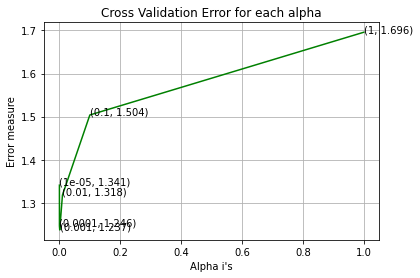

For values of best alpha =  0.001 The train log loss is: 0.6268745249585356
For values of best alpha =  0.001 The cross validation log loss is: 1.2372901925756359
For values of best alpha =  0.001 The test log loss is: 1.2144672520488295


In [202]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)] # random values generation for lambda/alpha for hyperparameter tuning.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[] # list to store the values of log-loss.
# Logistic Regression (log_loss + hyperparameter tuning + calibration of the output ) for different values of lambda/alpha.
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42) # Wj =Wj-1 - Summation[r*(dL/dW)wj-1] till (Wj+1 -Wj) is small.
    clf.fit(train_text_feature_onehotCoding, y_train) 
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid") # here y_pred from the Log_Regr is passed to the CalibratedClassifier
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding) # predictin of y by calibrated classifier/model.
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    # sklearn.metrics.log_loss(y_true, y_pred, *, eps=1e-15, normalize=True, sample_weight=None, labels=None)
    # If not provided, labels will be inferred from y_true. 


fig, ax = plt.subplots() # fig: creates an area (like canvas) and ax: creates ticks,box etc.
ax.plot(alpha, cv_log_error_array,c='g') # line plot of lambda/alpha values on x-axis and cv_log_error_array on y-axis with green color.
for i, txt in enumerate(np.round(cv_log_error_array,3)): # iteration over list cv_log_error_array,start index=0 (by default)
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
    # (alpha[i],cv_log_error_array[i] ) is the xy position that is where to plot 
    # and (alpha[i],np.round(txt,3)) is the text i.e at above position what is text to be placed ie, (alpha[i],txt)
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

# applying again Logistic Regression model with the best value of alpha/lambd.
best_alpha = np.argmin(cv_log_error_array) # returns the index of the min log loss from the cv_log_error_array
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [203]:

def get_intersec_text(df): # takes test_df and cv_df as the arguments.
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1 # summing all the words in the column (column wise sum)
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts)) # will zip a word with its number of times it occured
    # Eg : {ro': 3, 'arg487trp': 39, 'arg49': 7}
    # text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts)) 
    len1 = len(set(df_text_features)) # counts the no of words in the set of 'test_df' dataframe 
    len2 = len(set(train_text_features) & set(df_text_features)) # counts the common words in test_df and train_df
                                                                 # also counts the common words in cv_df and train_df
    return len1,len2

In [204]:
len1,len2 = get_intersec_text(test_df) # function call to compute the counts no of words in the set of 'test_df' dataframe 
                                       # counts the common words in test_df and train_df

print(len1)
print(len2)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data") # percentage of no of common words between test_df and train_df
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")# percentage of no of common words between cv_df and train_df

29778
28642
96.185 % of word of test data appeared in train data
97.572 % of word of Cross Validation appeared in train data


<h1>4. Machine Learning Models</h1>

In [205]:


#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y) # training the model with Data X, labels Y.
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x) # prediction of 'y'

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0]) # (pred_y - actual_y)/(actual_y)
    plot_confusion_matrix(test_y, pred_y) # how this function works refer below:
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    # Recall matrix (row sum=1)
    #divid each element of the confusion matrix with the sum of elements in that Row (axis=1)
    # A =(((C.T)/(C.sum(axis=1))).T) 
    # sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)

In [206]:
# Here we are calculating the performance of the trained model on the test datasets.
def report_log_loss(train_x, train_y, test_x, test_y,  clf): # the log loss for train and test datasets.
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [207]:

# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices): # 
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>



In [208]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],  
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding)) # stack of gene and variation features
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

# stacking using 'Onehotcoding'
train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr() # stacking of (gen,variation) feature & Text feature
train_y = np.array(list(train_df['Class'])) # converting train_df['Class'] into an array.

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))  # converting test_df['Class'] into an array.

print(test_x_onehotCoding)
cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))

# stacking using 'responsecoding'
train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


  (0, 83)	1.0
  (0, 761)	1.0
  (0, 2188)	0.013482158898384987
  (0, 2189)	0.06922484530803079
  (0, 2208)	0.04062222318511938
  (0, 2231)	0.34299717028501764
  (0, 2243)	0.06824794779373713
  (0, 2247)	0.2773500981126146
  (0, 2285)	0.7071067811865475
  (0, 2340)	1.0
  (0, 2363)	0.10185010546583881
  (0, 2405)	0.7071067811865475
  (0, 2436)	0.4472135954999579
  (0, 2448)	0.24253562503633297
  (0, 2460)	0.05331911679747279
  (0, 2515)	0.08958280175293667
  (0, 2551)	0.2886751345948129
  (0, 2625)	0.05975357384005499
  (0, 2626)	0.08597725166623411
  (0, 2627)	0.026198125853112302
  (0, 2696)	0.7071067811865476
  (0, 2700)	0.23408229439226114
  (0, 2723)	0.020951886854752806
  (0, 2726)	0.4588314677411235
  (0, 2749)	0.3740321796016854
  :	:
  (664, 55199)	0.009241548209148602
  (664, 55203)	0.00925202402936951
  (664, 55232)	0.05976143046671968
  (664, 55240)	0.040893041005476534
  (664, 55262)	0.04753326309841802
  (664, 55263)	0.01285117762342563
  (664, 55264)	0.11359236684941296
  (

In [209]:

# Using train data generated using "Onehotcoding" features
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape) # (2124, 55845)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape) # (665, 55845)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape) # (532, 55845)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 56294)
(number of data points * number of features) in test data =  (665, 56294)
(number of data points * number of features) in cross validation data = (532, 56294)


In [210]:
# Using train data generated using "Responsecoded" features
# text_feature_responseCoding = np.zeros((df.shape[0],9)) and df: train_df/test_df/cv_df
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape) # (2124, 27) Refer the above code for detail on why 27
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape) # (665, 27)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape) # (532, 27)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


<h2>4.1. Base Line Model</h2>

<h3>4.1.1. Naive Bayes</h3>

<h4>4.1.1.1. Hyper parameter tuning</h4>

for alpha = 1e-05
Log Loss : 1.323773886928578
for alpha = 0.0001
Log Loss : 1.3215514252433604
for alpha = 0.001
Log Loss : 1.318381912166045
for alpha = 0.1
Log Loss : 1.3048410149333192
for alpha = 1
Log Loss : 1.2896404435638333
for alpha = 10
Log Loss : 1.411515664606865
for alpha = 100
Log Loss : 1.4559154376402246
for alpha = 1000
Log Loss : 1.375936154767823


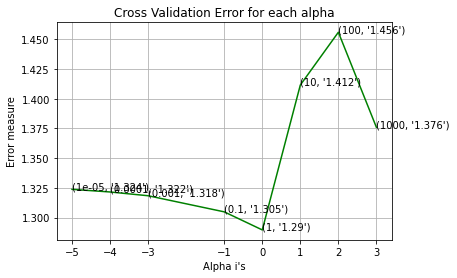

For values of best alpha =  1 The train log loss is: 0.8938733741039135
For values of best alpha =  1 The cross validation log loss is: 1.2896404435638333
For values of best alpha =  1 The test log loss is: 1.2881417462621418


In [211]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i) # class sklearn.naive_bayes.MultinomialNB(*, alpha=1.0, fit_prior=True, class_prior=None)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # sklearn.metrics.log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs))  # printing the log loss for cv dataset: (for all values of alpha)

# plotting:
fig, ax = plt.subplots() # creates a fig area and ax : creates ticks, square etc..
ax.plot(np.log10(alpha), cv_log_error_array,c='g') # plots a line plot between log(alpha) - x-axis and cv_log_error on y-axis.
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i])) # prints the annotation text on the plot.
plt.grid()
plt.xticks(np.log10(alpha)) # log(alpha) values as x-ticks.
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array) # gives the index of the best value of alpha or index of minimum cv_log_error_array.
clf = MultinomialNB(alpha=alpha[best_alpha]) # passing the best value alpha as the parameter
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

# printing the log loss for train, test and cv datasets: (for best value of alpha)
predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h4>4.1.1.2. Testing the model with best hyper paramters</h4>

Log Loss : 1.2896404435638333
Number of missclassified point : 0.3890977443609023
-------------------- Confusion matrix --------------------


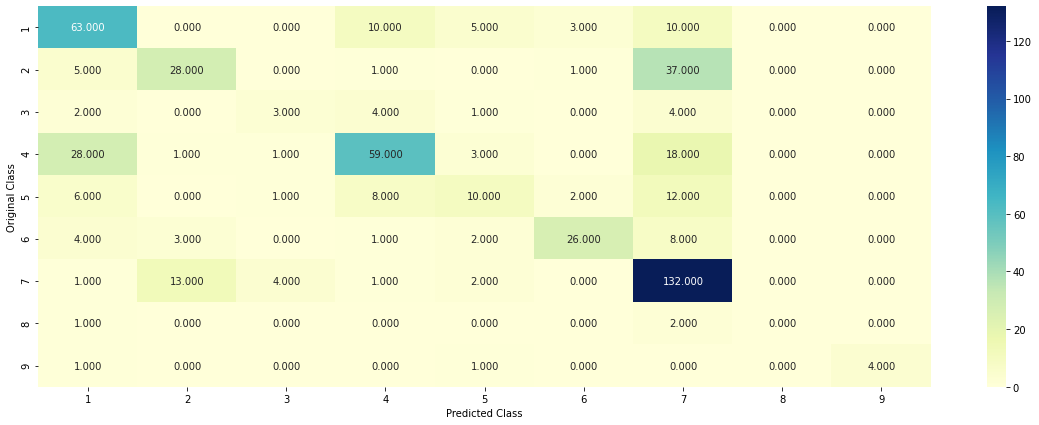

-------------------- Precision matrix (Columm Sum=1) --------------------


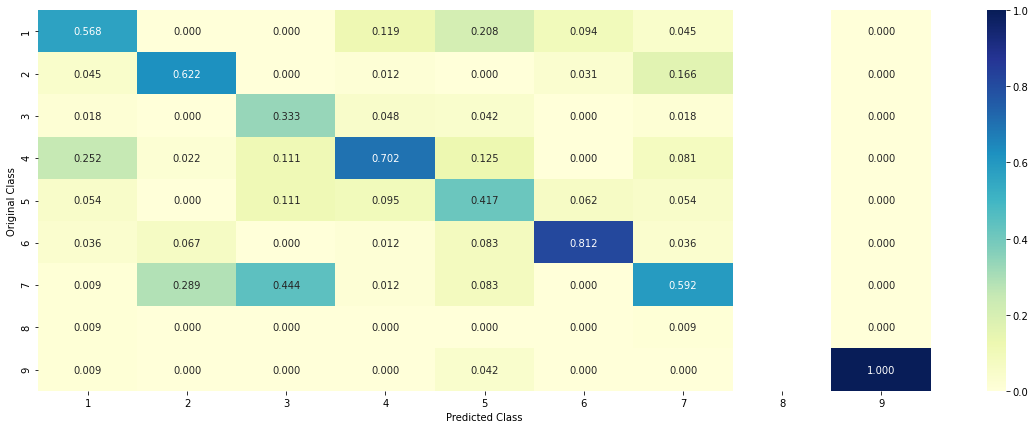

-------------------- Recall matrix (Row sum=1) --------------------


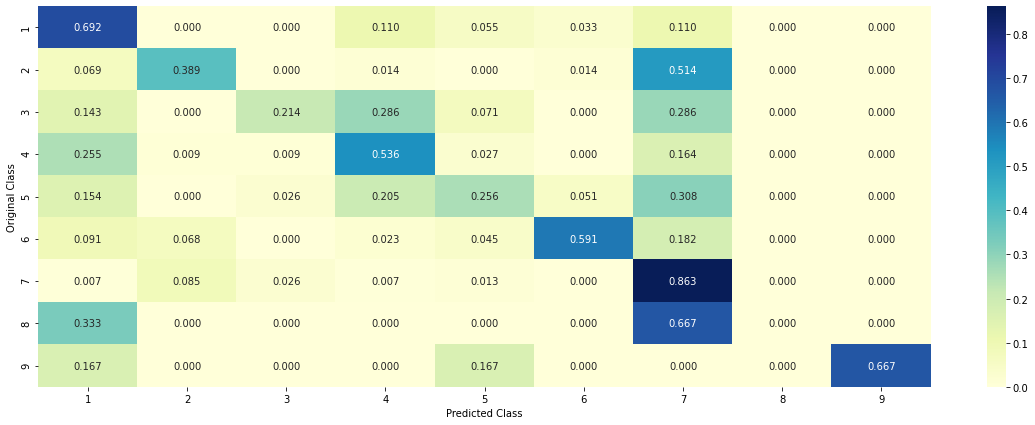

In [212]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------
# Testing the model with best hyper paramters ie, best value of alpha:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray())) # passing true labels and pred labels as arguments

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [216]:
test_point_index = 107 # this is the row number we are passing.
no_feature = 200

predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index]) # test_x_onehotcoding is matrix of shape (665,55416)
# sig_clf is already trained model, trained using train_x_onehotCoding (which is of shape (2124,55416))



print("Predicted Class :", predicted_cls[0]) # predicted_cls[0] implies with axis=0 ie, in column wise
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4)) # here 4 refers to the rounding of prob values upto 4 places
# ie, Predicted Class Probabilities:[[0.0913 0.0764 0.0136 0.109  0.0305 0.0329 0.6377 0.0045 0.0042]]
print("Actual Class :", test_y[test_point_index])
print("*"*100)
print(test_y.shape) # (665,1) no of Rows : 665
print(test_y[test_point_index]) # Actual class label of the test_point_index in test_y dataframe (which is single value) ie, scalar
indices=np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)


print(test_x_onehotCoding[test_point_index].shape)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0627 0.0851 0.0198 0.0858 0.0491 0.0377 0.6493 0.0053 0.0053]]
Actual Class : 7
****************************************************************************************************
(665,)
7
--------------------------------------------------
Out of the top  200  features  0 are present in query point


From the above output we can conclude that, test_x_onehotCoding[test_point_index] has (1,55416) shape.ie, One Row with 55416 columns. 

And the value in each column represents the normalized values of normalized form of "onehot encoded" matrix. ie, 
Note: We are doing BOW for the text feature and normalizing it.  

# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [110]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0627 0.0851 0.0198 0.0858 0.0491 0.0377 0.6493 0.0053 0.0053]]
Actual Class : 7
--------------------------------------------------
Out of the top  100  features  0 are present in query point


<h2>4.2. K Nearest Neighbour Classification</h2>

<h3>4.2.1. Hyper parameter tuning</h3>

for alpha = 5
Log Loss : 1.0910587595814358
for alpha = 11
Log Loss : 1.0829615318334858
for alpha = 15
Log Loss : 1.0758149152442915
for alpha = 21
Log Loss : 1.0756225951507015
for alpha = 31
Log Loss : 1.073828684275945
for alpha = 41
Log Loss : 1.073310754051668
for alpha = 51
Log Loss : 1.078356470068972
for alpha = 99
Log Loss : 1.0982136798657511


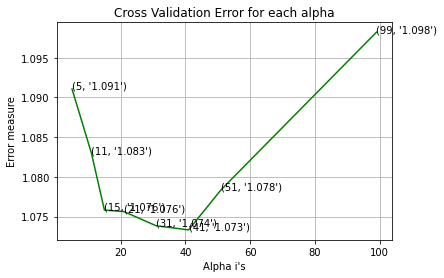

For values of best alpha =  41 The train log loss is: 0.8407691886720048
For values of best alpha =  41 The cross validation log loss is: 1.073310754051668
For values of best alpha =  41 The test log loss is: 1.149729928476602


In [111]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


alpha = [5, 11, 15, 21, 31, 41, 51, 99] # For different values of nearest neighbours ie, K
cv_log_error_array = [] # To store the log loss for different values of K
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i) # Passing the N-neighbors = i implies that for different values of nearest neighbors
    clf.fit(train_x_responseCoding, train_y) # we are using Responsedcoded train data (since dimension is less)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid") 
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots() # fig: creates an area for plotting and ax: creates ticks,squares etc. for plotting.
ax.plot(alpha, cv_log_error_array,c='g') # plots the line plot with x-axis as values of alpha(nearest neighbors) and y-axis as cv_log_error_array.
for i, txt in enumerate(np.round(cv_log_error_array,3)): 
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

# Training K-NN with the best value of alpha or best K (no of nearest neighbors)
best_alpha = np.argmin(cv_log_error_array) # gives the index of minimum cv_log_error_array.
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha]) 
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding) # predicting probabilites of class label on train_x_responsecoding data.
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 1.073310754051668
Number of mis-classified points : 0.39285714285714285
-------------------- Confusion matrix --------------------


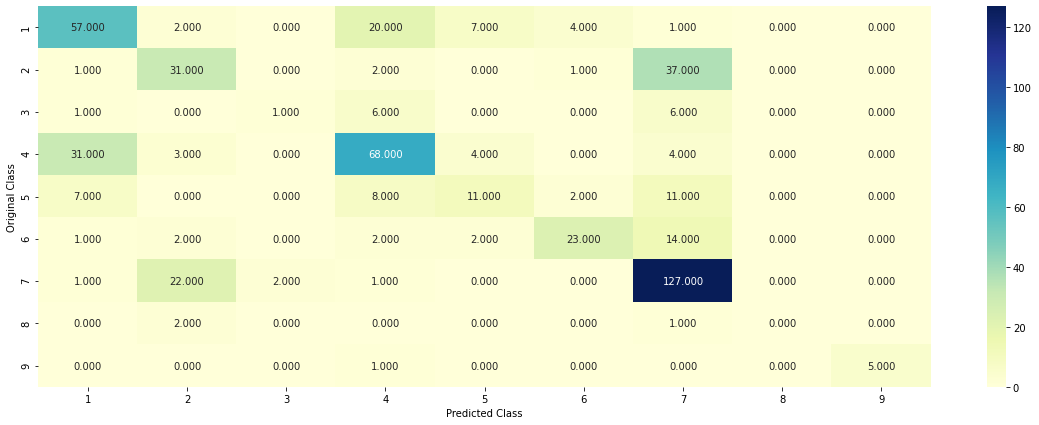

-------------------- Precision matrix (Columm Sum=1) --------------------


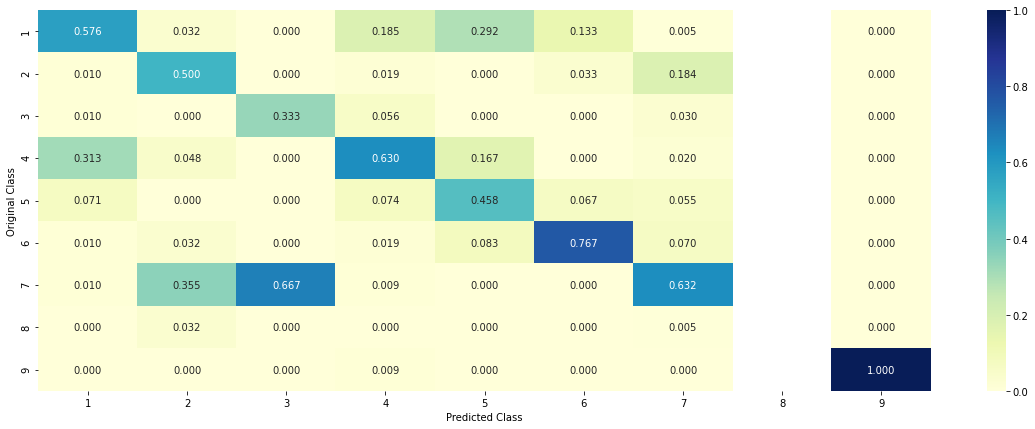

-------------------- Recall matrix (Row sum=1) --------------------


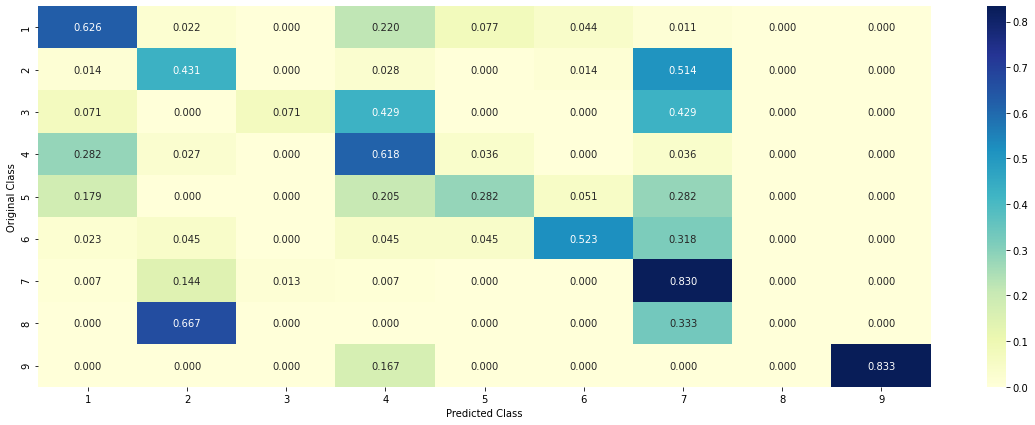

In [112]:

# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha]) # building the K-NN model with the best value of K (nearest neighbors).
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf) 

<h3>4.2.3.Sample Query point -1</h3>

In [218]:
# Training the K-NN model with the best value of K
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y) 

# Testing the model with the data in the test_y by passing the test_point_index.
test_point_index = 100
print("*"*100)
print(test_x_responseCoding.shape) #(665, 27)
print("*"*100)

print(type(test_x_responseCoding)) # <class 'numpy.ndarray'>
print(test_x_responseCoding[100].shape) # test_x_responseCoding[100] here [100] refers to row number. (27,1) column matrix
# ie, 100th row in test_x_responseCoding array which has 27 columns and this 100th Row by default represented as column matrix

print(test_x_responseCoding[test_point_index]) # prints as an array (column matrix) with only 1 column and 27 rows
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1)) # reshape(1,-1) Converts (27,1) to (1,27)


print("Predicted Class :", predicted_cls[0]) # here [0] refers to axis=0 ie, Column wise.
print("Actual Class :", test_y[test_point_index]) # actaual class of test_point_index in "test_y" Dataset.
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
# don't forget that clf is trained model with best "K" value. And it has class labels also stored in it.

# In the above test_x_responseCoding[test_point_index].reshape(1, -1):-> gives the datapoint of 100th Row, along with it 
# To find "K=alpha", ie, find "K" nearest neighbors to the above datapoint.

print("+"*100)
print(" 11 Nearest Points")

print("+"*100)
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])


print(len(neighbors))
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))
print(train_y[neighbors[1][0]])

****************************************************************************************************
(665, 27)
****************************************************************************************************
<class 'numpy.ndarray'>
(27,)
[0.0952381  0.11428571 0.0952381  0.0952381  0.11428571 0.0952381
 0.19047619 0.1047619  0.0952381  0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.13222594 0.1259484  0.02452168 0.16427462 0.0631511  0.05237358
 0.40724231 0.01200929 0.01825308]
Predicted Class : 7
Actual Class : 7
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 11 Nearest Points
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The  1  nearest neighbours of the test points belongs to classes [7]
2
Fequency of nearest points : Counter({7: 1})
[7]


<h3>4.2.4. Sample Query Point-2 </h3>

In [219]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 58

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))


Predicted Class : 1
Actual Class : 1
the k value for knn is 1 and the nearest neighbours of the test points belongs to classes [1]
Fequency of nearest points : Counter({1: 1})


<h2>4.3. Logistic Regression</h2>

<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.3911873803045074
for alpha = 1e-05
Log Loss : 1.3762347520394955
for alpha = 0.0001
Log Loss : 1.220182348594128
for alpha = 0.001
Log Loss : 1.198037857140701
for alpha = 0.01
Log Loss : 1.2185962819027267
for alpha = 0.1
Log Loss : 1.4859409966484705
for alpha = 1
Log Loss : 1.7169490226648665
for alpha = 10
Log Loss : 1.7447023660260512
for alpha = 100
Log Loss : 1.7475543165369798


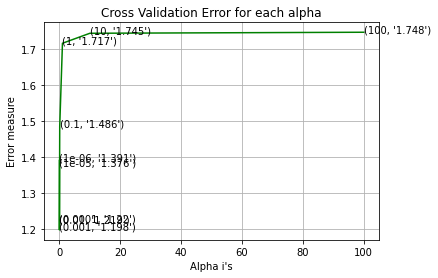

For values of best alpha =  0.001 The train log loss is: 0.5136987958088853
For values of best alpha =  0.001 The cross validation log loss is: 1.198037857140701
For values of best alpha =  0.001 The test log loss is: 1.1363586251437394


In [224]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42) # Balancing the data
    clf.fit(train_x_onehotCoding, train_y) # using the onehotencoded data
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding) 
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 1.198037857140701
Number of mis-classified points : 0.34962406015037595
-------------------- Confusion matrix --------------------


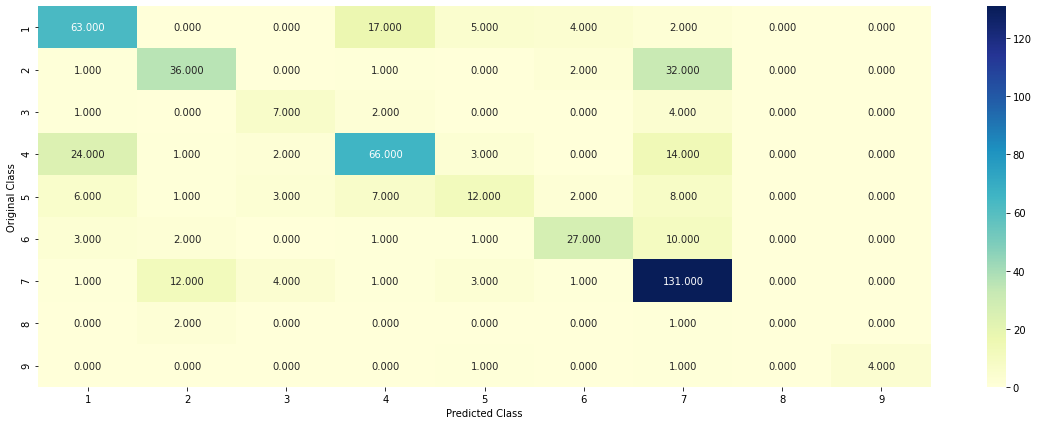

-------------------- Precision matrix (Columm Sum=1) --------------------


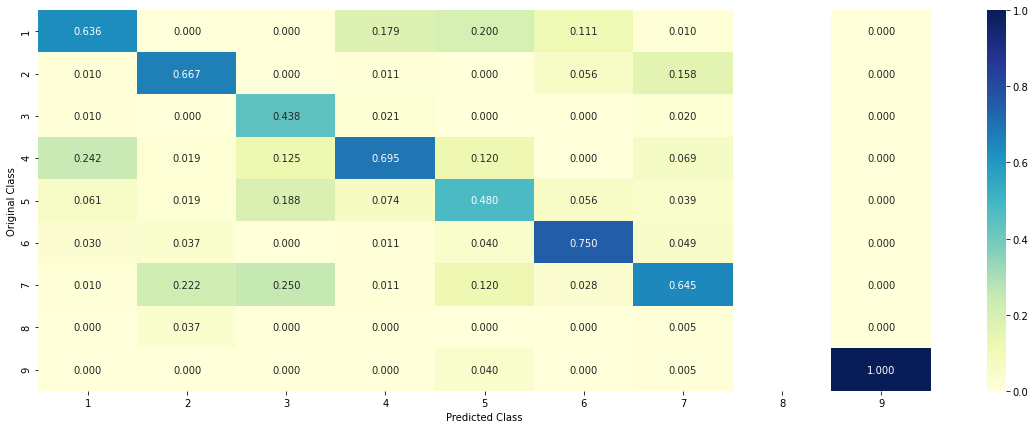

-------------------- Recall matrix (Row sum=1) --------------------


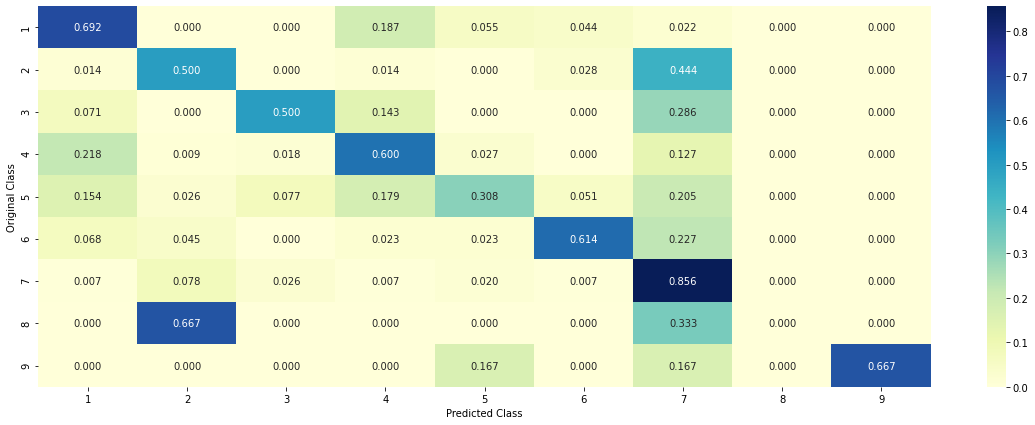

In [225]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.1.3. Feature Importance</h4>

In [226]:
def get_imp_feature_names(text, indices, removed_ind = []):
# the above function takes following arguments:
# test_df['TEXT'].iloc[test_point_index] ie, Row no corr to test_point_index is passed,indices[0],
# test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature
# indices[0] is of shape (500,1)
    word_present = 0
    tabulte_list = [] # contains the index, word, True/False
    incresingorder_ind = 0
    for i in indices: # iterates over top 500 Rows and here train_gene_feature_onehotcoding has shape : (2124,232)
        if i < train_gene_feature_onehotCoding.shape[1]: # check row no of indices[0] and row number of the train_gene_feat_onehotcoding
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"]) 
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i] # train_text_features is a list of 53508 values and train_text_features[i] fetches index wise.
            yes_no = True if word in text.split() else False # checks the word present in 'text.split()'
            if yes_no: # if the word is present in text.split() then this condition is True.
                word_present += 1 # incrementing the word_present value
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
            # increasingorder_ind : gives the index
            # train_text_features[i] is a List which gives the ith index "word" and this word is checked in text.split()
            # ie, test_df['TEXT'] is split using text.split() 
            # and the word from the List train_text_features[i] is checked in the above text.split() words index wise.
            # sample output : 93 Text feature [transforming] present in test data point [True]
        incresingorder_ind += 1
    print(word_present, "most important features are present in our query point")
    print("-"*50)
    print("The features that are most important of the ",predicted_cls[0]," class:")
    print(tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))
    # sample output :102 Text feature [missense] present in test data point [True]

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [227]:


# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index]) # shape of predicted_cls is (1,1)
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature] # all rows and columns from zero to till no_feature index.
# argsort returns the indices of the sorted array by looking into indices of the Input array.
# Here Input array is clf.coef_ and indices of sorted array by looking into indices of the clf.coef_ array.
print(clf.coef_.shape) # (9, 55700) Query Datapoint is multiplied with each weight vector (tota 9 rows)
# Selects the one with minimum sigmoid(WT*X)
# [predicted_cls-1] : (outputs scalar) gives the Row  number of clf.coef (numpy array) (-1 because Row numbering starts from index=0)
# And since weight matrix (clf.coef_) has 9 Rows and 55700 columns.
# [:,:no_feature] : gives the Column number (starting from column index=0 to till "no_of_feature") of clf.coef_matrix 

print(indices.shape) # (1,500)
print("-"*50)

get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 5
Predicted Class Probabilities: [[0.33   0.03   0.0068 0.2151 0.371  0.0182 0.018  0.0056 0.0053]]
Actual Class : 5
(9, 56294)
(1, 500)
--------------------------------------------------
428 Text feature [encodes] present in test data point [True]
439 Text feature [identified] present in test data point [True]
494 Text feature [reagent] present in test data point [True]
Out of the top  500  features  3 are present in query point


In [231]:
print(predicted_cls)
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature] # all rows and columns from zero to till no_feature index.
#
print(train_gene_feature_onehotCoding.shape)

print(indices.shape) # (1,500)

print(clf.coef_.shape) # (9,55700)
print(indices.shape) # (1,500)


print(clf.coef_[predicted_cls-1])
print(clf.coef_[predicted_cls-1].shape) # (1,55700)
print(clf.coef_[predicted_cls-1][:,:no_feature].shape) # (1,500)
print(indices[0].shape)

[5]
(2124, 231)
(1, 500)
(9, 56294)
(1, 500)
[[-0.31584116 -0.00158108 -0.04911195 ... -0.02336205 -0.00247779
  -0.00778225]]
(1, 56294)
(1, 500)
(500,)


In [230]:
print(clf.coef_.shape) # (9, 55978)
# eg: For Row 1 in train_x_onehotcoding, we are multiplying each element in row1 with weights ()

print(train_x_onehotCoding.shape) # (2124, 55978)
# coef_ndarray of shape (n_classes, n_features)
# Coefficient of the features in the decision function.
# In total 9classes and 55978 features, ie, each class has

(9, 56294)
(2124, 56294)


<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [127]:

test_point_index = 90
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.2683 0.0141 0.0032 0.687  0.0087 0.0059 0.0055 0.0045 0.0029]]
Actual Class : 1
--------------------------------------------------
138 Text feature [s297f] present in test data point [True]
194 Text feature [suppressor] present in test data point [True]
298 Text feature [harboring] present in test data point [True]
388 Text feature [instability] present in test data point [True]
420 Text feature [novel] present in test data point [True]
451 Text feature [mammalian] present in test data point [True]
460 Text feature [highest] present in test data point [True]
495 Text feature [mss] present in test data point [True]
Out of the top  500  features  8 are present in query point


<h3>4.3.2. Without Class balancing</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.3548792438763462
for alpha = 1e-05
Log Loss : 1.3327404424389
for alpha = 0.0001
Log Loss : 1.2274830431429105
for alpha = 0.001
Log Loss : 1.1942051441665371
for alpha = 0.01
Log Loss : 1.2582324892960477
for alpha = 0.1
Log Loss : 1.417879038467404
for alpha = 1
Log Loss : 1.6450770590739363


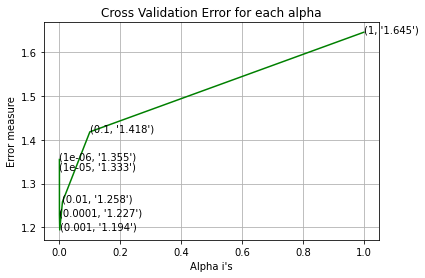

For values of best alpha =  0.001 The train log loss is: 0.5030773935025713
For values of best alpha =  0.001 The cross validation log loss is: 1.1942051441665371
For values of best alpha =  0.001 The test log loss is: 1.1604838812694016


In [128]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 1.1942051441665371
Number of mis-classified points : 0.35714285714285715
-------------------- Confusion matrix --------------------


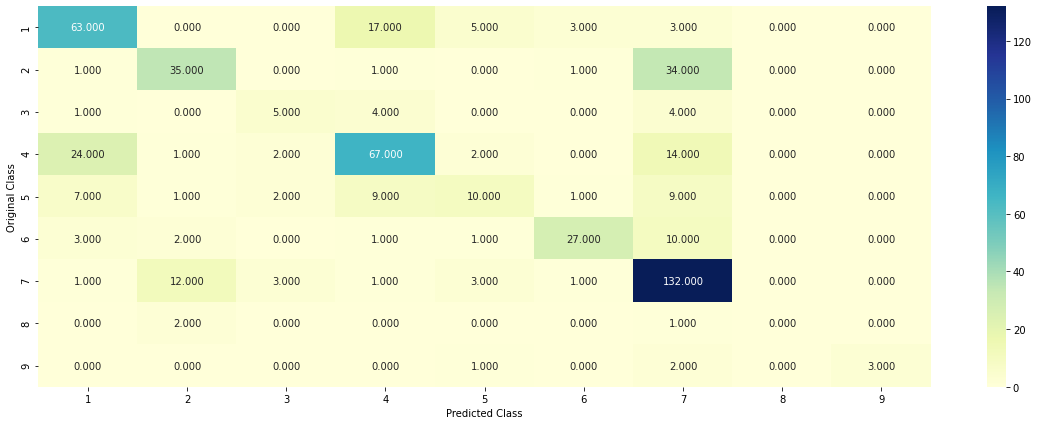

-------------------- Precision matrix (Columm Sum=1) --------------------


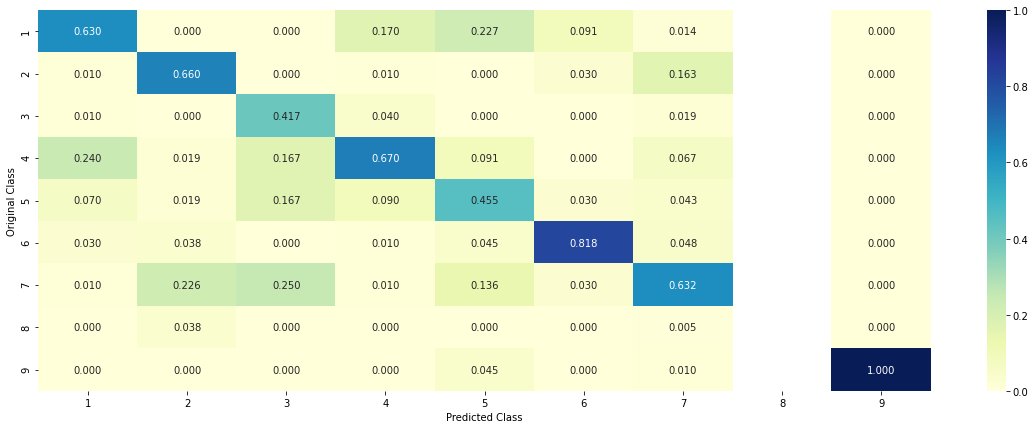

-------------------- Recall matrix (Row sum=1) --------------------


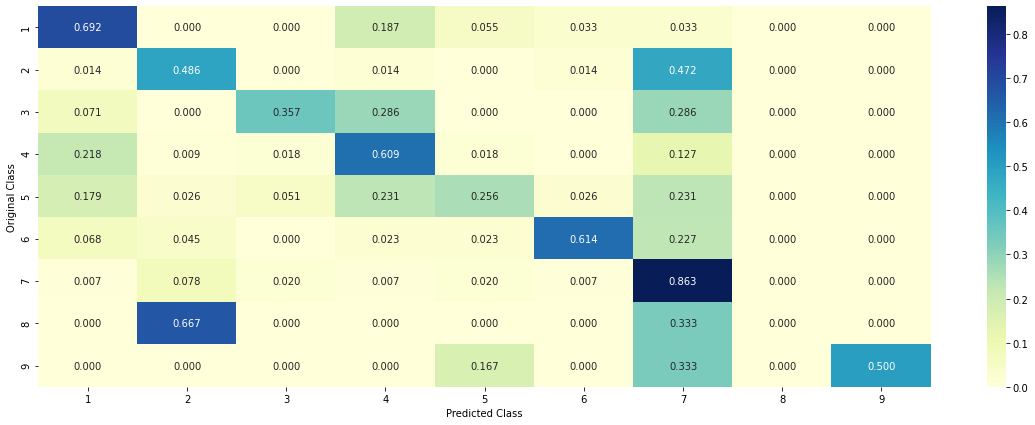

In [129]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [130]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 5
Predicted Class Probabilities: [[0.3197 0.0267 0.0065 0.2859 0.3199 0.0169 0.017  0.0044 0.003 ]]
Actual Class : 5
--------------------------------------------------
346 Text feature [identified] present in test data point [True]
350 Text feature [encodes] present in test data point [True]
380 Text feature [reagent] present in test data point [True]
Out of the top  500  features  3 are present in query point


<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [131]:
test_point_index = 200
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.2161 0.085  0.0146 0.3251 0.0451 0.0331 0.2681 0.0078 0.005 ]]
Actual Class : 4
--------------------------------------------------
255 Text feature [suppressor] present in test data point [True]
269 Text feature [dld] present in test data point [True]
297 Text feature [activating] present in test data point [True]
303 Text feature [adapted] present in test data point [True]
371 Text feature [degradation] present in test data point [True]
Out of the top  500  features  5 are present in query point


<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

for C = 1e-05
Log Loss : 1.3625510957828373
for C = 0.0001
Log Loss : 1.2972361414396545
for C = 0.001
Log Loss : 1.2321498751546438
for C = 0.01
Log Loss : 1.2176590487309178
for C = 0.1
Log Loss : 1.3913196541339297
for C = 1
Log Loss : 1.731375779974297
for C = 10
Log Loss : 1.7480488546553032
for C = 100
Log Loss : 1.7480488456513767


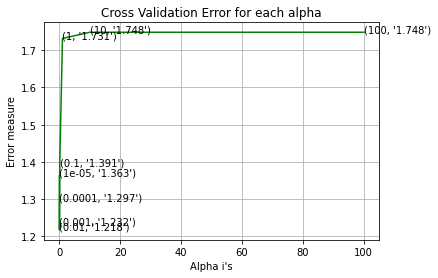

For values of best alpha =  0.01 The train log loss is: 0.713144405477957
For values of best alpha =  0.01 The cross validation log loss is: 1.2176590487309178
For values of best alpha =  0.01 The test log loss is: 1.1485178779042502


In [132]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.2176590487309178
Number of mis-classified points : 0.37406015037593987
-------------------- Confusion matrix --------------------


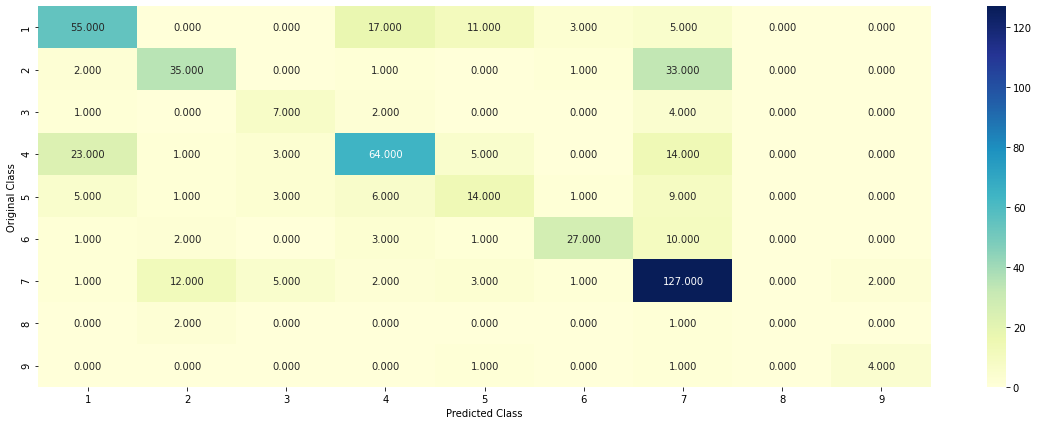

-------------------- Precision matrix (Columm Sum=1) --------------------


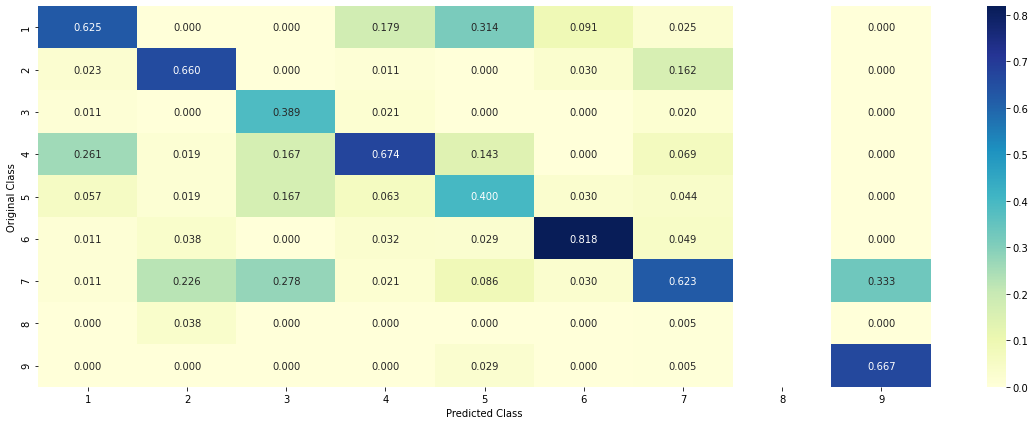

-------------------- Recall matrix (Row sum=1) --------------------


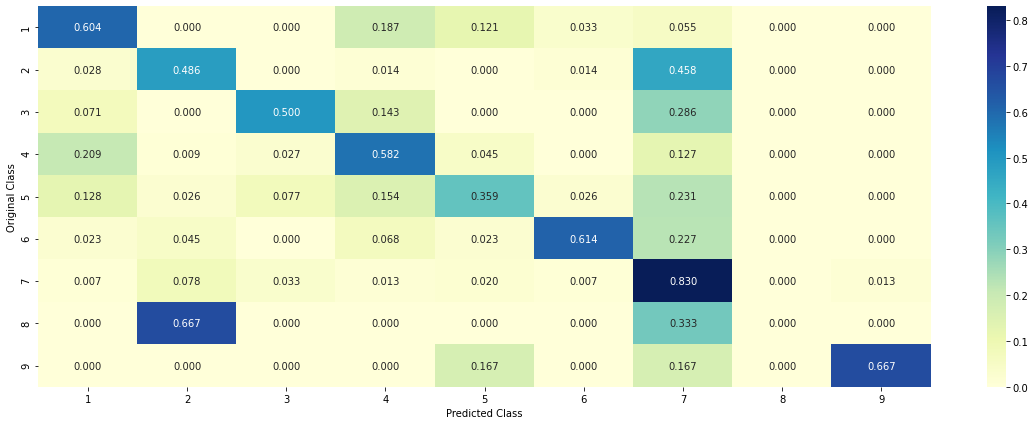

In [133]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)


<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [134]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 5
Predicted Class Probabilities: [[0.1252 0.0797 0.019  0.162  0.4553 0.0233 0.1196 0.009  0.0069]]
Actual Class : 5
--------------------------------------------------
Out of the top  500  features  0 are present in query point


<h4>4.3.3.2. For Incorrectly classified point</h4>

In [135]:
test_point_index = 200
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.1935 0.0925 0.0164 0.2912 0.0564 0.0402 0.2975 0.0061 0.0062]]
Actual Class : 4
--------------------------------------------------
149 Text feature [constitutively] present in test data point [True]
216 Text feature [activated] present in test data point [True]
247 Text feature [downstream] present in test data point [True]
253 Text feature [activating] present in test data point [True]
275 Text feature [ach] present in test data point [True]
Out of the top  500  features  5 are present in query point


<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>

In [136]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
# Hyperparameter tuning of 2 parameters here: number of trees and depth of the tree
alpha = [100,200,500,1000,2000] # number of trees or no of decisions or no of nodes.
max_depth = [5, 10] # maximum depth
# ([100,5],[100,10],[200,5],[200,10],[500,5],[500,10],[1000,5],[1000,10],[2000,5],[2000,10]) :-> (alpha,max_depth) pairs. 
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

# ([10,5],[10,10],[20,5],[20,10],[50,5],[50,10],.....[500,10]) :

for n_estimators = 100 and max depth =  5
Log Loss : 1.2690220355340471
for n_estimators = 100 and max depth =  10
Log Loss : 1.2133914061815358
for n_estimators = 200 and max depth =  5
Log Loss : 1.2616411269272594
for n_estimators = 200 and max depth =  10
Log Loss : 1.2059399654155023
for n_estimators = 500 and max depth =  5
Log Loss : 1.2565983592784624
for n_estimators = 500 and max depth =  10
Log Loss : 1.2048859528565885
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2543774665794944
for n_estimators = 1000 and max depth =  10
Log Loss : 1.2001302513520946
for n_estimators = 2000 and max depth =  5
Log Loss : 1.2548867842353286
for n_estimators = 2000 and max depth =  10
Log Loss : 1.1995880629156106
For values of best estimator =  2000 The train log loss is: 0.6798329243788471
For values of best estimator =  2000 The cross validation log loss is: 1.1995880629156106
For values of best estimator =  2000 The test log loss is: 1.1556105416923033


here alpha's are [10,20,50,100,500] max_depth = [5,10] so we get 10 values of log-losses i.e 5*2. now we take argmin of these 10 values. suppose 9th values has got min value it's corresponding index in alpha would be 9/2 i.e 4 and alpha[5] is 500 in this case. so for alpha=500 we got lower log loss. these 10 values would be ([10,5],[10,10],[20,5],[20,10],[50,5],[50,10],.....[500,10]) [10,5]

Means suppose if you take alpha as 10 and then it's corrosponding max_depth = 5 and build RF

<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.1995880629156106
Number of mis-classified points : 0.40225563909774437
-------------------- Confusion matrix --------------------


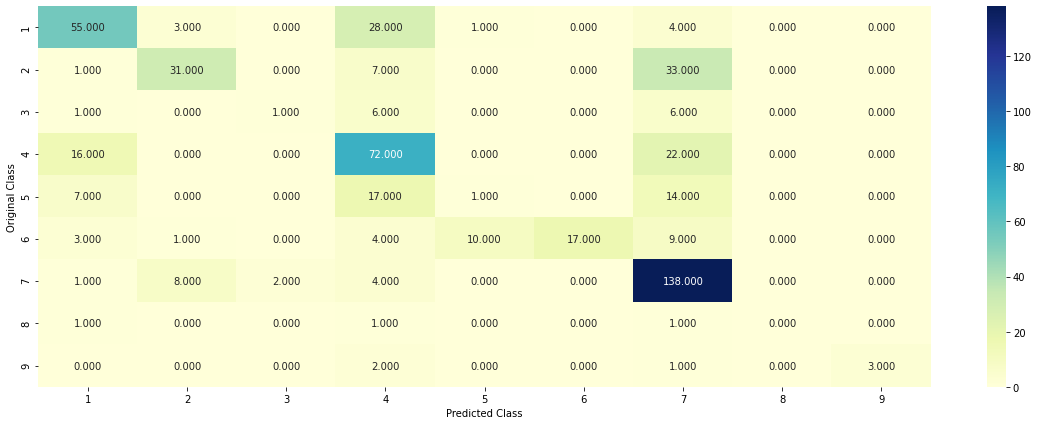

-------------------- Precision matrix (Columm Sum=1) --------------------


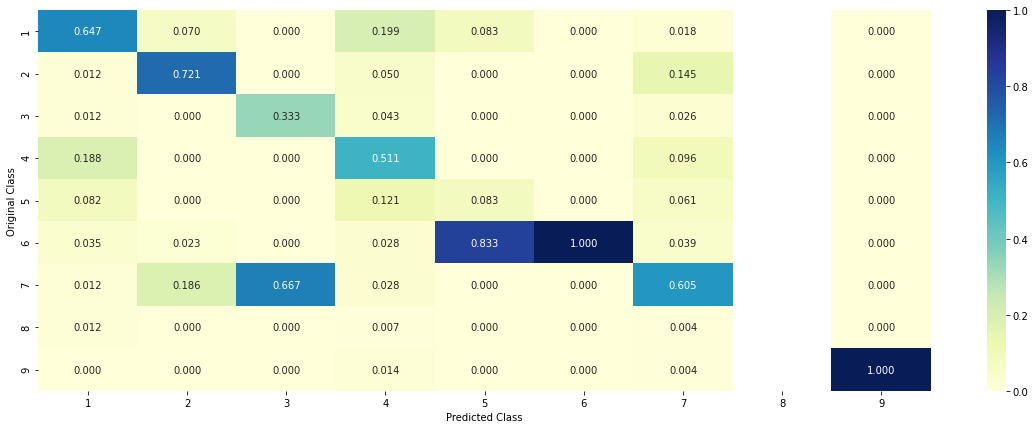

-------------------- Recall matrix (Row sum=1) --------------------


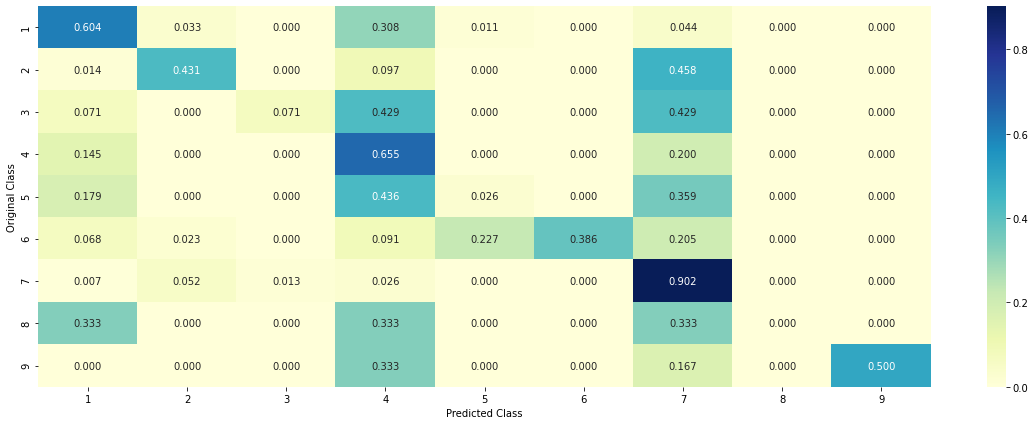

In [137]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)
# best_alpha%2 It's used because we don't want our max depth to be greater than 2. It can take value less than 2.

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [138]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.3978 0.0289 0.0246 0.1907 0.2288 0.0848 0.0306 0.0068 0.0071]]
Actual Class : 5
--------------------------------------------------
0 Text feature [kinase] present in test data point [True]
2 Text feature [activation] present in test data point [True]
9 Text feature [missense] present in test data point [True]
10 Text feature [function] present in test data point [True]
12 Text feature [constitutive] present in test data point [True]
13 Text feature [brca1] present in test data point [True]
26 Text feature [cells] present in test data point [True]
30 Text feature [functional] present in test data point [True]
31 Text feature [pathogenic] present in test data point [True]
34 Text feature [stability] present in test data point [True]
39 Text feature [variants] present in test data point [True]
40 Text feature [cell] present in test data point [True]
45 Text feature [yeast] present in test data point [True]
46 Text feature [deleterious

<h4>4.5.3.2. Inorrectly Classified point</h4>

In [139]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0438 0.0641 0.0179 0.0454 0.0415 0.0323 0.7446 0.0051 0.0054]]
Actuall Class : 7
--------------------------------------------------
0 Text feature [kinase] present in test data point [True]
1 Text feature [activating] present in test data point [True]
2 Text feature [activation] present in test data point [True]
3 Text feature [tyrosine] present in test data point [True]
4 Text feature [inhibitors] present in test data point [True]
5 Text feature [signaling] present in test data point [True]
6 Text feature [activated] present in test data point [True]
7 Text feature [oncogenic] present in test data point [True]
10 Text feature [function] present in test data point [True]
12 Text feature [constitutive] present in test data point [True]
14 Text feature [phosphorylation] present in test data point [True]
15 Text feature [treatment] present in test data point [True]
17 Text feature [downstream] present in test data point [True]
18 Text

<h3>4.5.3. Hyper paramter tuning (With Response Coding)</h3>

In [140]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
# total 6*4 = 24 pairs of alpha and max_depth.
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 
'''
fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/4)],max_depth[int(i%4)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 10 and max depth =  2
Log Loss : 2.0939373338320255
for n_estimators = 10 and max depth =  3
Log Loss : 1.7131197748684412
for n_estimators = 10 and max depth =  5
Log Loss : 1.397145030541407
for n_estimators = 10 and max depth =  10
Log Loss : 1.6977217264966393
for n_estimators = 50 and max depth =  2
Log Loss : 1.6957433466363228
for n_estimators = 50 and max depth =  3
Log Loss : 1.474160797380937
for n_estimators = 50 and max depth =  5
Log Loss : 1.3691918635688047
for n_estimators = 50 and max depth =  10
Log Loss : 1.7275840740999409
for n_estimators = 100 and max depth =  2
Log Loss : 1.55670001407173
for n_estimators = 100 and max depth =  3
Log Loss : 1.4768586229376188
for n_estimators = 100 and max depth =  5
Log Loss : 1.3637592772505556
for n_estimators = 100 and max depth =  10
Log Loss : 1.7042695932264382
for n_estimators = 200 and max depth =  2
Log Loss : 1.5973395276159295
for n_estimators = 200 and max depth =  3
Log Loss : 1.4489935451170888
f

<h3>4.5.4. Testing model with best hyper parameters (Response Coding)</h3>

Log loss : 1.3637592772505556
Number of mis-classified points : 0.49624060150375937
-------------------- Confusion matrix --------------------


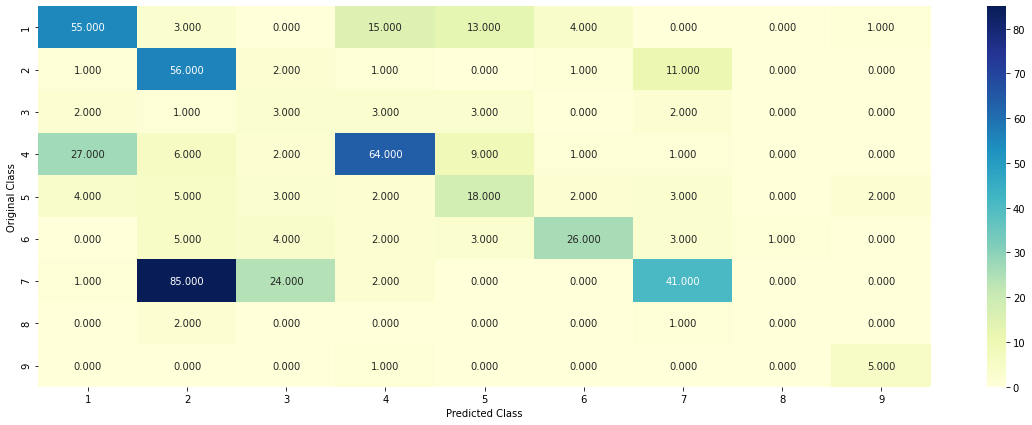

-------------------- Precision matrix (Columm Sum=1) --------------------


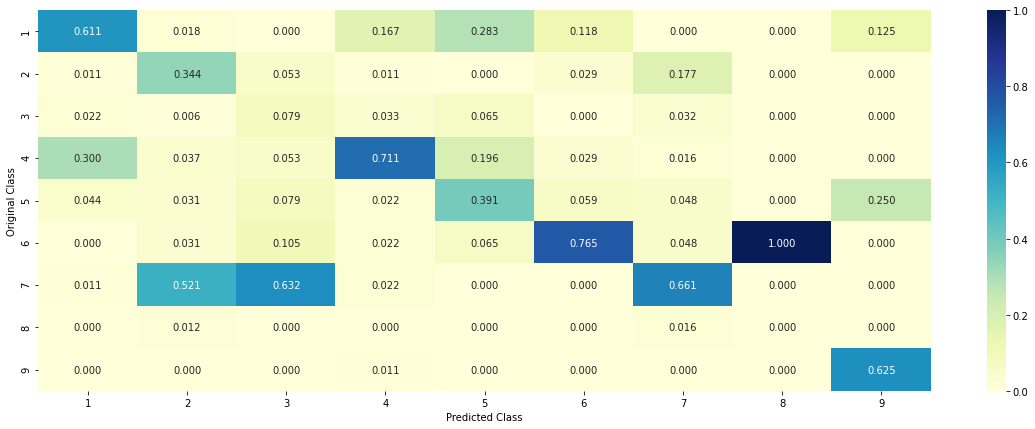

-------------------- Recall matrix (Row sum=1) --------------------


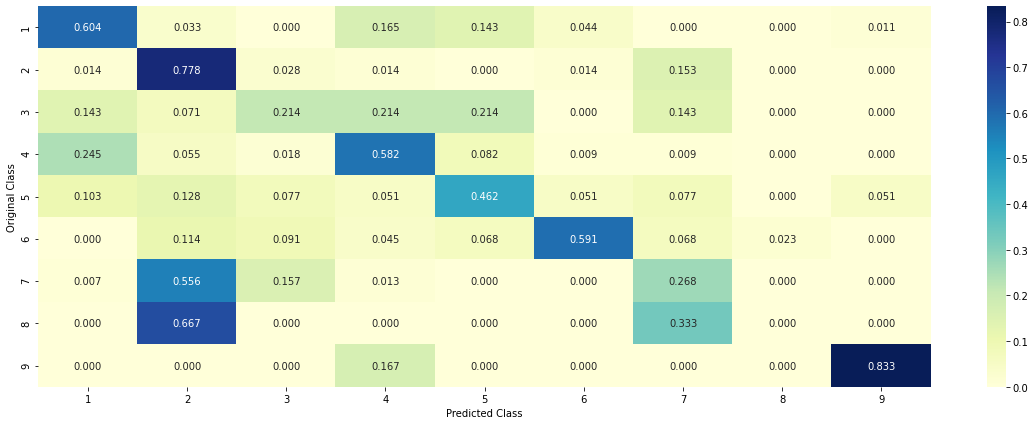

In [141]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)

<h3>4.5.5. Feature Importance</h3>

<h4>4.5.5.1. Correctly Classified point</h4>

In [142]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)


test_point_index = 1
no_feature = 27
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 5
Predicted Class Probabilities: [[0.0478 0.0076 0.085  0.0519 0.6274 0.1611 0.0052 0.0068 0.0072]]
Actual Class : 5
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Text is important feature
Variation is important feature
Gene is important feature
Gene is important feature
Text is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Text is important feature
Text is important feature
Text is important feature
Variation is important feature
Gene is important feature
Gene is important feature
Gene is important feature


<h4>4.5.5.2. Incorrectly Classified point</h4>

In [143]:

test_point_index = 100
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 7
Predicted Class Probabilities: [[0.0253 0.1748 0.2303 0.0281 0.0895 0.0482 0.3505 0.0278 0.0255]]
Actual Class : 7
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Text is important feature
Variation is important feature
Gene is important feature
Gene is important feature
Text is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Text is important feature
Text is important feature
Text is important feature
Variation is important feature
Gene is important feature
Gene is important feature
Gene is important feature


**Conclusion:**

By comparing all the model log loss, percentage of misclassified points and intepretability of the model, we conclude that Logistic Regression (One hot encoded features) and with class balancing gives the best results.
